   #  Introduction to Regular Expressions for lawyers
   ---

<div style="border:solid steelblue 3px; padding: 20px">

**Регулярные выражения** (*англ. regular expressions*) — формальный язык, используемый для поиска и обработки подстрок в тексте с помощью определенным образом заданных правил. Правила состоят из последовательности символов и так называемых метасимволов (символы, имеющие в регулярном выражении специальное значение; подробнее см. об этом ниже), которые задают *pattern (строку-образец, шаблон)*. Для целей обработки текста также дополнительно может быть задана строка замены.
    
Любой современный язык программирования, будучи формальным языком, поддерживает регулярные выражения (regular expressions, RegEx). С помощью RegEx можно проверить соответствие строки некоторому зарнее заданному шаблону, выполнить замену в строке и извлечь из строки какие-либо данные. **Главное преимущество** - встроенность в язык программирования. **Существенный недостаток** – невозможность описания сложных преобразований, зависящих от входных данных (например, `a` заменить на `b`, а `c` – на `d`).
    
---
    
**Концептуальная картинка** (см. ниже)

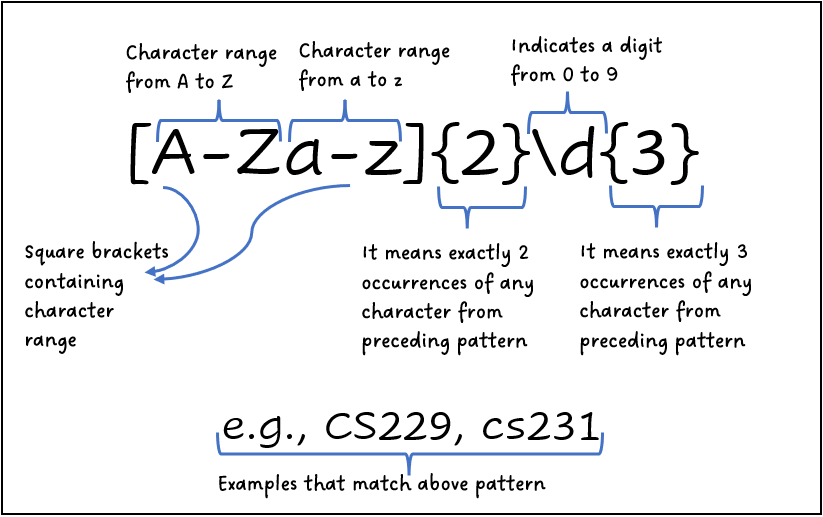
[id]:https://towardsai.net/p/l/regular-expression-regex-in-python-the-basics 
---

In [ ]:
import re # импортируем спец. модуль re

<div style="border:solid black 3px; padding: 20px">

Рассмотрим пример использования регулярных выражений (РВ). Ниже - регулярное выражение, которое проверяет корректность вводимых адресов электронной почты.

In [ ]:
lines = ['+77762102233', 'ivanov@mail.ru', 'stepanov@g.nsu.ru', 'habr.com', 'lena@gmail.com', '123@ngs.ru'] 
pattern = r'(([a-z0-9._%-]+)@([a-z0-9._-]+\.[a-z]{2,}))' # задаем шаблон
emails = [] # создадим пустой список - "контейнер", куда будем складывать "правильные" адреса
for line in range(len(lines)):
    result = re.search(pattern, lines[line])
    if result:
        emails.append(result[0])    
print('Корректные адреса: ', emails)

**Базовый синтаксис и некоторые инструкции для RegEx в целом:**                                                                               
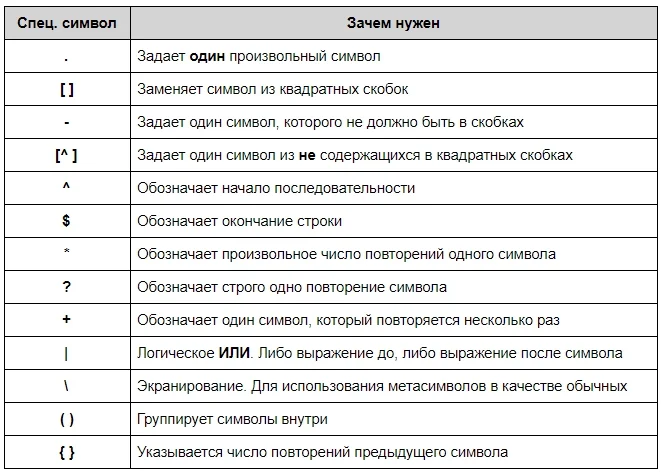
[id]:https://tproger.ru/translations/regular-expression-python/
---

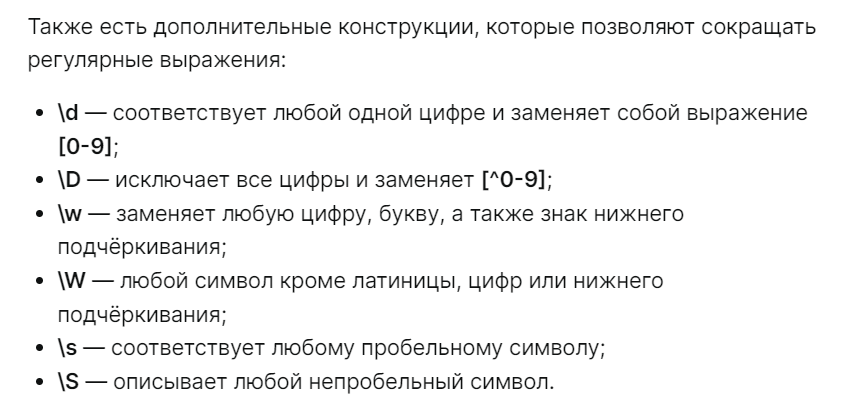
[id]:https://tproger.ru/translations/regular-expression-python/
---

**Python:**       
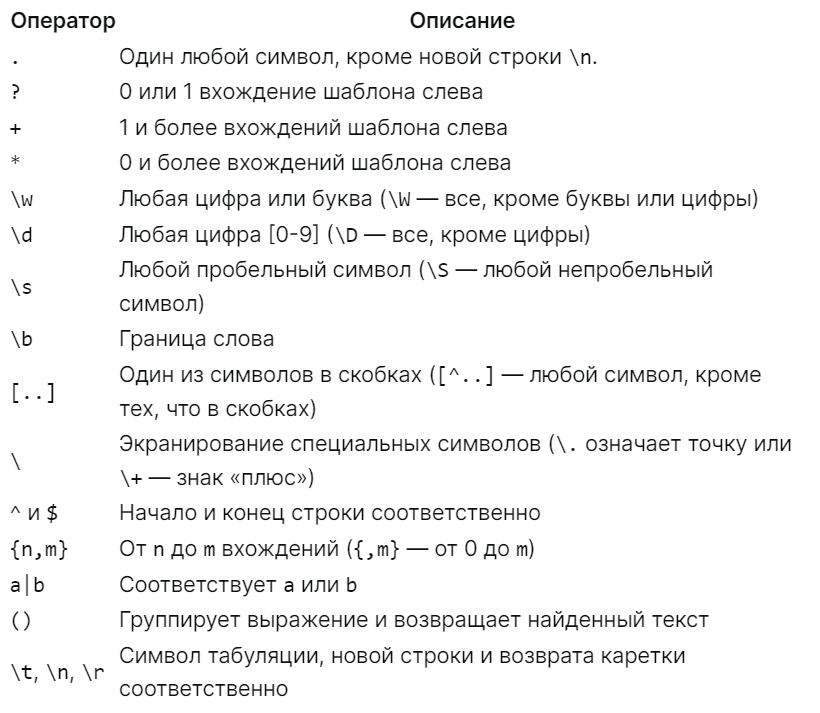

---

Простейшим регулярным выражением является регулярное выражение, состоящее из последовательности простых символов:

In [ ]:
s = 'Каждый имеет право...Гражданин имеет право...'
print(re.findall(r'право', s))

<div style="border:solid black 3px; padding: 20px">
Добавляя в регулярное выражение метасимволы, мы можем осушествлять более "тонкий поиск". Например, добавив в описание шаблона символы `^` или `$`, мы сможем задать правило поиска подстроки соответственно в начале либо в конце строки: 

In [ ]:
re.findall(r'^Каждый', s)

In [ ]:
re.findall(r'право...$', s)

С помощью метасимвола `\b` можно найти строку, которая начинается или заканчивается нужной последовательностью символов:

In [ ]:
com = 'https://habr.com, github.com, vsrf.ru'

In [ ]:
re.findall(r'\w*.com\b', com) # здесь также исползовался метасимвол `\w` вместе с `*` для поиска пред. последовательности символов

In [ ]:
re.findall(r'\bv\w*', com) 

Также с помощью метасимвола `|` мы можем добавить в регулярное выражение логику **ИЛИ**

In [ ]:
re.findall(r'\w*.com|\w*.ru', com) 

**Скобочные выражения**, заданные на определенном отрезке (`range`) упорядоченного множества символов, позволяют находить один из символов указанного набора: 

In [ ]:
s = 'Решение суда, принятое по спору, рассмотренному в порядке пункта 4 статьи 445 ГК РФ...'
re.findall(r'[0-9]', s) # выведем все цифры из строки s 

Отрезок, с помощью которого можно задать шаблон для поиска любой из букв русского алфавита - `[А-ЯЁа-яё]`. Добавив к скобочному выражению метасимвол `+`, выведем все последовательности, состоящие из букв русского алфавита:

In [ ]:
re.findall(r'[А-ЯЁа-яё]+', s) # выведем все цифры из строки s 

С помощью следующего регулярного выражения выведем последовательности, состоящие из всех символов (включая пробелы), кроме цифр, запятой и точки:

In [ ]:
re.findall(r'[^0-9,.]+', s) # выведем все цифры из строки s 

<div style="border:solid black 3px; padding: 20px">
    
Для некоторых однородных выражений существуют классы символов, которые позволяют более компактно задавать шаблоны: `\d`, `\D`, `\w`, `\W`, `\s`, `\S`, `.` (значения указанных метасимволов см. выше)

In [ ]:
s = '''№ 1. __________
...
№ 21. __________
...
№ 1000022222.
'''
re.findall(r'№\s\d*', s) # выведем все строки, который неачинаются с символа номера, а после него - последовательность цифр  

<div style="border:solid black 3px; padding: 20px">
    
Количество выводимых символов можно задать с помощью так называемых **квантификаторов**: `{n}`, где n - количество символов; `+`, `*`, `?` (значения указанных метасимволов см. выше).

Например, выведем все даты формата число-месяц-год:

In [ ]:
s = 'Amit 34-3456 12.05.2007, 16 May 2022, XYZ 56-4532 11-11-2011, ABC 67-8945 12.01.2009'
re.findall(r'\d+\s[a-zA-Z]+\s\d+', s) # выведем все цифры из строки s 

<div style="border:solid black 3px; padding: 20px">

Часто бывает удобно объединить несколько более простых РВ, соответствующих значимым для нас элементам строки, в одно большое выражение. В этом случае используют так называемую **группировку выражений**.

Группы обозначаются метасимволами в виде круглых скобок `(`, `)`, которые имеют такой же смысл, как в математических выражениях. После группировки можно использовать рассмотренные выше квантификаторы, которые будут применяться уже не к отдельным последовательностям в шаблоне, а к целому РВ. 

In [ ]:
# Например, (ма)* будет соответствовать нулю или более повторений ма.
s = 'мамамамамамамамамамамамамама'
re.match(r'(ма)*', s) # выведем все цифры из строки s 

**В Python есть два варианта использования групп:**

1) *нумерованные группы*: по умолчанию; группы нумеруются слева направо, начиная с 1; затем к группам можно обращаться по номерам и получать текст, который соответствует выражению в группе

2) *именованные группы*: позволяют задавать группе имя; синтаксис именованной группы `(?P<name>regex)`

Например, напишем РВ, позволяющее находить URLs, сгруппировав также выражения для поиска соответствующих элементов URLs: 

In [ ]:
s = '''http://centralny.nsk.sudrf.ru
       https://mos-gorsud.ru/
       http://www.supcourt.ru/
       https://www.aclweb.org/portal/
       http://www.vk.com/
'''
# finditer возвращает итератор с объектами совпадений (match-objects), к которым можно обратиться через цикл
result = re.finditer(r'(http|https)(://)([a-zA-Z0-9._-]+)\.(ru|com|org)', s)

In [ ]:
for match in result: 
    print(match.group(1)) # изменяя номер группы, можем получить интересующие нас объекты совпадений

Иногда, когда выражение достаточно сложное, не очень удобно определять номер группы + может появится потребность внести изменения в изначальный шаблон (тогда нужно будет заново интерпретировать новый порядок групп или вносить изменения). Поэтому часто группам более удобно присваивать осмысленные имена.

In [ ]:
s = '''http://centralny.nsk.sudrf.ru
       https://mos-gorsud.ru/
       http://www.supcourt.ru/
       https://www.aclweb.org/portal/
       http://www.vk.com/
'''
result_named = re.finditer(r'(?P<protocol>http|https)(://)(?P<domain>[a-zA-Z0-9._-]+)\.(?P<tld>ru|com|org)', s) # выведем все цифры из строки s 

In [ ]:
for match in result_named: 
    print(match.group('domain'))

In [ ]:
result_named = re.finditer(r'(?P<protocol>http|https)(://)(?P<domain>[a-zA-Z0-9._-]+)\.(?P<tld>ru|com|org)', s) # выведем все цифры из строки s 
for match in result_named: 
    print(match.group())

C помощью метода `groupdict()` можно получить словарь, где ключи - имена групп, а значения - подстроки, которые им соответствуют:

In [ ]:
result_named = re.finditer(r'(?P<protocol>http|https)(://)(?P<domain>[a-zA-Z0-9._-]+)\.(?P<tld>ru|com|org)', s) # выведем все цифры из строки s 
for match in result_named: 
    print(match.groupdict())

<div style="border:solid black 3px; padding: 20px">

**'Жадный'** (до последнего вхождения шаблона) и **'ленивый'** (до первого вхождения шаблона) поиск

In [ ]:
html_s = '<a href="/" class="vs-header-title-text">Верховный Суд Российской Федерации</a>'

In [ ]:
re.findall(r'<.*>', html_s) # жадный

In [ ]:
re.findall(r'<.*?>', html_s) # ленивый

<div style="border:solid steelblue 3px; padding: 20px">
<h3><center>Функции и методы $$re$$ </center></h3>

    
| Функция | Смысл | Что возвращает |
| --- | --- | --- |
|<font size=2 color='blue'>re.match (pattern, string)</font>|Ищет pattern (только!) в начале строки string  |Возвращает спец. Match-объект, который хранит разную информацию о совпадении|
|<font size=2 color='blue'>re.search (pattern, string)</font>|Ищет pattern по всей строке string|Возвращает Match-объект с первым совпадением в строке|
|<font size=2 color='blue'>re.finditer (pattern, string)</font>|Ищет pattern по всей строке string|Возвращает спец. объект - итератор, содержащий Match-объекты для каждого найденного совпадения по шаблону|
|<font size=2 color='blue'>re.findall (pattern, string)</font>|Ищет pattern по всей строке string|Возвращает список со всеми найденными совпадениями|
|<font size=2 color='blue'>re.sub (pattern, repl, string)</font>|Заменяет в строке string все pattern на repl|Возвращает измененную строку|
|<font size=2 color='blue'>re.split (pattern, string, [maxsplit=0])</font>|Разделяет строку string по подстрокам, соответствующим pattern|Возвращает список получившихся строк|
|<font size=2 color='blue'>re.compile (pattern)</font>|Собирает регулярное выражение в спец. Pattern-объект для будущего использования в других re-функциях|спец. Pattern-объект|

На практике, чаще всего, приходится сталкиваться с **3-мя методами**:   

1) `re.search()`                                                                                                               

2) `re.findall()`                                                                                                              

3) `re.sub()`.

Рассмотрим их на конкретных примерах:

In [ ]:
s = 'Закон суров, но это закон'
result = re.search(r'закон', s) # используем метод search (ищет по всей строке и возвращает первое найденное совпадение)
print(result) # выведет спец. объект - Match object
result.group(0) # с помощью метода group выведем результат поиска по шаблону

In [ ]:
result = re.findall(r'закон', s.lower()) # используем метод findall (ищет по всей строке и возвращает все найденные совпадения)
result

In [ ]:
s = 'закон суров, но это закон'
result = re.sub(r'закон', 'преподаватель', s) # заменим найденные совпадения другой строкой (подстрокой)
result

In [ ]:
s = 'Арбитражный суд Новосибирской области удовлетворил исковое заявление ООО "СИБИРЬ" к ООО "МОСКВА"'
print('Было:', s)
result = re.sub('удовлетворил исковое заявление', 'отказал в удовлетворении искового заявления', s)
print('Стало:', result)

Для того, чтобы каждый раз заново не задавать регулярное выражение часто удобно использовать функцию `re.compile(pattern)`

In [ ]:
s = 'закон суров, но это закон'

pattern = re.compile(r'закон')
res_1 = pattern.sub('преподаватель', s)
res_2 = pattern.findall(s)

In [ ]:
display(res_1)
res_2

<div style="border:solid green 3px; padding: 20px">
<h3><center>Примеры</center></h3>

**Напишем шаблон для поиска в тексте наименований арбитражных судов**

In [ ]:
s_1 = 'Арбитражный суд Новосибирской области рассмотрел'
s_2 = 'Арбитражного суда Красноярского Края рассмотрел'

pattern = r"Арбитражн\w{2,3}\sсуд\s[А-ЯЁа-яё]*\s*[А-ЯЁа-яё]*"
result = re.search(pattern, s_1)
print(result[0])

In [ ]:
pattern = r"Арбитражн\w{2,3}\sсуд\w*\s[А-ЯЁа-яё]*\s*[А-ЯЁа-яё]*"
result = re.search(pattern, s_2)
print(result[0])

In [ ]:
pattern = re.compile(r"Арбитражн\w{2,3}\sсуд\w*\s[А-ЯЁа-яё]*\-*\s*[А-ЯЁа-яё]*\s*[А-ЯЁа-яё]*")
s = 'Арбитражный суд Кабардино-Балкарской республики рассмотрел'
result = pattern.search(s)
print(result[0])

In [ ]:
pattern = re.compile(r'(?:(?:Арбитражн\w{2,3}\sсуд\w*)|(?:\d{1,2}\-\й\sарбитражн\w{2,3}\sапелляционн\w{2,3}\sсуд\w*))'
                     r'(\s[А-ЯЁа-яё]*\-*(\s*[А-ЯЁа-яё]*)\-*\s*(?:Республики*|Эл*|области*|\w*\s*округа*|Петербурга*))*'
                    )
d = '15 мая 2020 года Арбитражный суд Новосибирской области рассмотрел'
e = '15 мая 2020 года Арбитражный суд Кабардино-Балкарской Республики рассмотрел'
f = '15 мая 2020 года Арбитражный суд Еврейской автономной области рассмотрел'
g = '15 мая 2020 года Арбитражный суд Чувашской Республики-Чувашии рассмотрел'
h = '15 мая 2020 года Арбитражный суд города Санкт-Петербурга рассмотрел'
i = '15 мая 2020 года Арбитражный суд Ямало-Ненецкого автономного округа рассмотрел'
k = '15 мая 2020 года Арбитражный суд Ханты-Мансийского автономного округа — Югры рассмотрел'
l = '15 мая 2020 года Арбитражный суд Волго-Вятского округа рассмотрел'
m = '15 мая 2020 года Арбитражный суд Республики Марий Эл рассмотрел'
n = '15 мая 2020 года 11-й арбитражный апелляционный суд рассмотрел'
o = '15 мая 2020 года 9-й арбитражный апелляционный суд рассмотрел'


result = pattern.search(m)
print(result[0]) 

In [ ]:
decisions = [d, e, f, g, h, i, k, l, m, n, o]
decisions

In [ ]:
for d in range(len(decisions)):
    result = re.search(pattern, decisions[d])[0]
    print(result) 

<div style="border:solid black 3px; padding: 20px">
Если обратиться к полному списку всех арбитражных судов России, можно заметить, что данное РВ покроет не все примеры: например, Арбитражный суд города Севастополя. Подумайте, каким образом (1) можно оптимизировать данное РВ (сделать его более простым); (2) покрыть все возможны варианты.

**Создадим шаблон для замены имён в судебном решении**

In [ ]:
text = '''22 мая 1991 г. директорами компании
«Jamblick Limited» были назначены Ходорковский М.Б., Невзлин Л.Б., Дубов
В.М. и Брудно М.Б., которые являлись и бенефициарами. Акционеры
компании были зарегистрированы следующим образом: 50 % акций
принадлежали компании «Riggs Valmet Isle of Man Nominees Limited», а 50 %
- компании «Riggs Valmet Nominees Limited». 07 апреля 1995 г. Гусаровым
М.Б. из банка «Менатеп» направлено требование об отставке указанных лиц
с 15.11.1993 г., после чего директорами назначены Бонд Питер, Джулия Пик,
Пламмер Ян. 30 августа 1995 г. было подтверждено, что бенефиаром
является Моисеев В.В. из МФО «Менатеп», а компания ему продана
15.11.1993 г.'''

In [ ]:
print (re.sub (r'([А-ЯЁ]\w*)\s[А-ЯЁ]{1}\.[А-ЯЁ]{1}\.', 'ФИО', text))

<div style="border:solid black 3px; padding: 20px">
РВ получилось довольно простым: при изменении порядка в написании фамилии и (или) инициалов, либо в случае полных ФИО на русском, оно работать не будет. Попробуйте доработать РВ и "достать" полные name, last name for: Бонд Питер, Джулия Пик.

**Создадим шаблон для поиска в тексте фамилий и инициалов судей**

In [ ]:
s = 'Судья Октябрьского районного суда города Новосибирска Иванова А. А. вынесла решение.'
pattern_0 = r"[А-ЯЁа-яё]+\s[А-ЯЁа-яё]{1}\.\s*[А-ЯЁа-яё]{1}\."
name = re.findall(pattern_0, s)
print(f'Судьи: {name}')

Пока мы нашли только фамилию и инициалы! Дополним наш шаблон так, чтобы найти именно судей:

In [ ]:
t = 'судья Петров Д.И., председательствующий Сидоров К.Н., судей Пименову К.А., Иванова Д.И.'
pattern_1 = re.compile(r"(?:(?:судь\w{1,2})|(?:председательствующ\w{2,3}))(\s*[А-ЯЁа-яё]+\s[А-ЯЁа-яё]{1}\.\s*[А-ЯЁа-яё]{1}\.)")
name = re.findall(pattern_1, t)
print(f'Судьи: {name}')

In [ ]:
t = 'судья Петров Д.И., председательствующий Сидоров К.Н., судей Пименову К.А., Иванова Д.И., Афанасьева К.И.'
pattern_2 = re.compile(r'(?:(?:судь\w{1,2})|(?:председательствующ\w{2,3})|(?:судей))'
                       r'((?:\s*[А-ЯЁа-яё]+\s[А-ЯЁа-яё]{1}\.\s*[А-ЯЁа-яё]{1}\.\,*\s*)*)')
name = re.findall(pattern_2, t)
print(f'Судьи: {name}')

**Посмотрим, как будет работать наш шаблон на большом тексте**

In [ ]:
import codecs
file = codecs.open('Решение.txt', 'r')
text = file.read()
file.close()

In [ ]:
text

**Напишем функцию, которая применяет шаблон к данному тексту + удалим все повторы в нашем списке с помощью set()**

<div style="border:solid black 3px; padding: 20px">
    
Под **функциями** в программировании понимают набор инструкций, которые выполняют определенную задачу. 
    <div style="border:solid black 3px; padding: 20px">
    **Функции помогают:** 
        
    1) структурировать код;
    2) повысить читаемость кода: связанные команды объединяют в блок с произвольным общим именем, которое подсказывает назначение всех команд в блоке;
    3) оптимизировать код: вызов функции по имени инициализирует блок инструкций, что позволяет переиспользовать код; более того, внутри функций можно вызывать другие функции, создавая таким образом композиции функций.
</div></div>

 **Функции можно условно разделить на:**
 
1) *встроенные* функции Python: например, `print()`, `len()`, `str()` и т.д.

2) *собственные или именованные* функции, определенные пользователем с помощью ключевого слова `def`
    
<div style="border:solid steelblue 3px; padding: 20px">
$$Элементы$$ $$функций$$

    
**Ключевое слово** `def` задает имя функции, в скобках указываются её параметры; имя функции + параметры = заголовок функции, который заканчивается двоеточием

**Имена параметров**, которые задают и меняют поведение функции (при вызове функции на месте параметров пользователем указываются конкретные аргументы, которые используются программой при выполнении заданных инструкций)
    
**Тело функции: инструкции**, которые исполнятся при вызове функции; каждая инструкция начинается с отступа в четыре пробела

**Ключевое слово** `return` указывает на значение, которое должна вернуть функция в результате выполнения инструкций.

In [ ]:
# наименования параметров функции по смыслу соответствуют аргументам - конкретному тексту и шаблону РВ, который используется 
# при выполнении команд, заданных встроенной функцией re.findall()
def find_judge(text, pattern):
    return re.findall(pattern, text)

In [ ]:
l = find_judge(text, pattern_1) 
result_1 = list(set(l))
print(result_1)

Видим, что шаблон № 1 не "увидел" последовательности, начинающиеся со слов "судей". 

Шаблон № 2 позволит их учесть, однако вернет список строк, над которыми целесообразно выполнить ряд манипуляций: 

- удалить лишние пробелы
- разбить строки, содержащие более 2-х ФИО, на отдельные элементы списка
- удалить получившиеся дубликаты.

In [ ]:
l = find_judge(text, pattern_2)
print(l)

In [ ]:
l_support_1 = []
for i in range(len(l)):
    if ',' in l[i]:
        l_support_2 = l[i].strip().split(',')
    else:
        l_support_1.append(l[i].strip())
result_2 = list(set(l_support_1 + l_support_2))
print(result_2)

Удалим оставшиеся пробелы:

In [ ]:
result_final = []
for i in result_2:
    result_final.append(i.strip())
print('Судьи: ', result_final)

<div style="border:solid green 3px; padding: 20px">
Также РВ можно использовать для "тонкого" поиска тематических фрагментов текста, содержащих ключевое слово

In [ ]:
s = "Заявитель  считает спорные постройки объектами недвижимого имущества, обладающими признаками самовольных построек.Судом установлено, что ответчику на праве общей совместной собственности принадлежит земельный участок, находящийся по адресу: Республика Саха (Якутия), г. Мирный, ул. Звездная, 64 «А», с разрешенным использованием – под жилую застройку."
pattern = r"прав\w*(.+)собственности.{,}."
result = re.search(pattern, s)
print(result[0])

In [ ]:
import codecs
file = codecs.open('Решение_2.txt', 'r',"utf-8")
text = file.read()
file.close()

In [ ]:
text

In [ ]:
def find_right(text, pattern):
    return re.findall(pattern, text)

In [ ]:
pattern = r".{,0}прав\w*\s*[А-ЯЁа-яё]*\s*[А-ЯЁа-яё]*\s*собственности.{,}."
find_right(text, pattern) 

In [ ]:
file = codecs.open('Обзор практики.txt', 'r',"utf-8")
text = file.read()
file.close()
text

In [ ]:
pattern = r"[А-ЯЁа-яё]*\s.{,0}прав\w*\s*[А-ЯЁа-яё]*\s*[А-ЯЁа-яё]*\s*собственности.{,}."
find_right(text, pattern)

In [ ]:
parts = find_right(text, pattern)
num = 1
for i in range(len(parts)):
    part_num = str(num) + ') ' + parts[i]
    print(part_num)
    num += 1

### Напишите собственное регулярное выражение, извлекающее из текста даты:

In [ ]:
result = re.findall(r'шаблон', 'Amit 34-3456 12.05.2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12.01.2009, 12 ноября 2022')
print(result)